In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
#Dtree has less accuracy but less time
#KNN has more accuracy but takes more time
data=pd.read_csv('../data/movie_metadata.csv')
#print data

In [3]:
data.head()
#SibSp-number of siblings and spouse
#Parah-number of parents or children
#cabin first alphabt represents a class and unless we know the ship structure we cannot use it also this has max non number values

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,NaN,0


In [4]:
#remove the waste parameters
data.head()
cols_to_drop=[
    #'aspect_ratio',
    #'budget',
    #'actor_1_facebook_likes',
    #'actor_2_facebook_likes',
    #'actor_3_facebook_likes',
    #'cast_total_facebook_likes',
    'title_year',
    #'facenumber_in_poster',   
    'genres',
    'plot_keywords',
    'movie_imdb_link',
    'movie_title',    
]
data=data.dropna()
data=data.drop(cols_to_drop,axis=1)
#print np.unique(data[["color"]],return_counts=True)[0]
#print np.unique(data[["content_rating"]],return_counts=True)[0]
#data.head()
#data1.head()
#new data frame in df
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,CCH Pounder,...,0,3054,English,USA,PG-13,237000000,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Johnny Depp,...,0,1238,English,USA,PG-13,300000000,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Christoph Waltz,...,1,994,English,UK,PG-13,245000000,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Tom Hardy,...,0,2701,English,USA,PG-13,250000000,23000,8.5,2.35,164000
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Daryl Sabara,...,1,738,English,USA,PG-13,263700000,632,6.6,2.35,24000


In [5]:
def convert_color(s):
        if s=='color':
            return 1
        else:
            return 0
        
def convert(s,li):
        return li.index[s]

def convertor(datalist,lis): 
    table_data = {}
    for t, ix in enumerate(lis):
        table_data[ix] = t
    elem = []
    for ix in datalist:
        elem.append(table_data[ix])
    return elem

def conv(datalist):
    if datalist>=0 and datalist<2.5:
        return 'D'
    elif datalist>=2.5 and datalist<5.0:
        return 'C'
    elif datalist>=5.0 and datalist<7.5:
        return 'B'
    else:
        return 'A'

In [6]:
dir_name=np.unique(data[["director_name"]],return_counts=True)[0]
act1_name=np.unique(data[["actor_1_name"]],return_counts=True)[0]
act2_name=np.unique(data[["actor_2_name"]],return_counts=True)[0]
act3_name=np.unique(data[["actor_3_name"]],return_counts=True)[0]
lang=np.unique(data[["language"]],return_counts=True)[0]
country=np.unique(data[["country"]])
content_rating=np.unique(data[["content_rating"]],return_counts=True)[0]
col=np.unique(data[["color"]],return_counts=True)[0]

In [7]:
data.director_name=convertor(data.director_name,dir_name)
data.actor_1_name=convertor(data.actor_1_name,act1_name)
data.actor_2_name=convertor(data.actor_2_name,act2_name)
data.actor_3_name=convertor(data.actor_3_name,act3_name)
data.language=convertor(data.language,lang)
data.country=convertor(data.country,country)
data.content_rating=convertor(data.content_rating,content_rating)
data.color=convertor(data.color,col)
print np.unique(data.imdb_score)
data.imdb_score=map(conv,data.imdb_score)

[1.6 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4
 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2
 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.
 9.2 9.3]


In [8]:
#sns.heatmap(data.corr())
data = data.reset_index(drop=True)
#data.info()

In [9]:
data = data.dropna() #drops the the rows with NAN
#data.describe() #TO-DO read what is quartile percentile
#surived is the target class

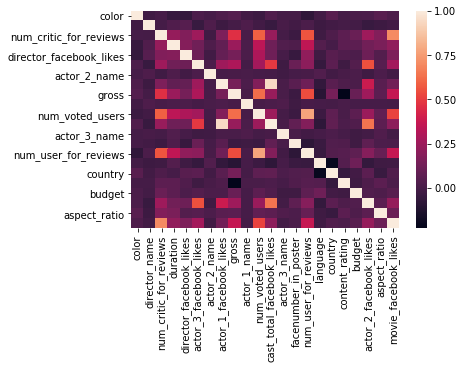

In [10]:
plt.figure()
sns.heatmap(data.corr())
#how much change in a perticular coloumn is dependent of another coloumn
#diagonal are relation of one col  with itself there for 1

In [11]:
#adding the data to the decision tree
#oot node is useually the most imp col
input_cols = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 
       'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']
out_cols = ['imdb_score']

X = data[input_cols]
y = data[out_cols]

#X.head()
print X.shape, y.shape

(3756, 22) (3756, 1)


In [12]:
#when you drop some the indexs remains same therefore we reindex them
#df.loc[3] loc is for location and 3 is the row number \, from this we get this particular row 
data = data.reset_index(drop=True)

# Functions for Decision Tree

In [16]:
def divide_data(x_data, fkey, fval):
    x_right = pd.DataFrame([], columns=x_data.columns)
    x_left = pd.DataFrame([], columns=x_data.columns)
    
    
    for ix in xrange(x_data.shape[0]):
        # Retrieve the current value for the fkey column
        val = x_data[fkey].loc[ix]
        
        # Check where the row needs to go
        if val > fval:
            # pass the row to right
            x_right = x_right.append(x_data.loc[ix])
        else:
            # pass the row to left
            x_left = x_left.append(x_data.loc[ix])
    
    # return the divided datasets
    return x_left, x_right


def entropy(col):
    counts = np.unique(col, return_counts=True)
    N = float(col.shape[0])
    
    ent = 0.0
    for ix in range(counts[0].shape[0]):
        frac = counts[1][ix] / N
        ent += (-1.0 * frac * np.log2(frac))
    return ent

def information_gain(xdata, fkey, fval):
    left, right = divide_data(xdata, fkey, fval)
    P = left.shape[0] / float(xdata.shape[0])
    Q = right.shape[0] / float(xdata.shape[0])
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000
    
    return entropy(xdata.Classification) - (P*entropy(left.Classification) + Q*entropy(right.Classification))

In [15]:
for fx in X.columns:
    print type(fx),
    #print information_gain(data, fx, data[fx].mean())

IndentationError: expected an indented block (<ipython-input-15-b7ef218b22c0>, line 3)

In [ ]:
# The DT class

In [ ]:
class DecisionTree:
    def __init__(self, depth=0, max_depth=5): #prop of each node of the tree
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None #helpfull at the leaf node and while pruning
    #its complexity is O(noOfRows*Col*2^Max_depth)
    #kNN has 0 training time
    def train(self, X_train):
        print self.depth, '-'*10
        # Get the best possible feature and division value
        features = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 
       'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']
        gains = [] #or IG
        for fx in features:
            gains.append(information_gain(X_train, fx, X_train[fx].mean()))
        
        # store the best feature (using min information gain)
        self.fkey = features[np.argmax(gains)]
        self.fval = X_train[self.fkey].mean()
        
        # divide the dataset
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        # Check the shapes
        #if the data can be further divided or not
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            self.target=set_target()
            return
        #if the max depth is reached
        if self.depth >= self.max_depth:
            self.target=set_target()
            return
      #recursive calls for each child node  
        # branch to right
        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right.train(data_right)
        # branch to left
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.target=set_target()
        return
    #predict function of the decision tree
    #it's complexity is O(Max_depth)
    #knn has O(m*n) hence DTree is better
    def predict(self, test):
        if self.fval>test[self.fkey]:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                 return self.target
            return self.left.predict(test)

In [ ]:
split = int(0.8 * data.shape[0])

training_data = data[:split]
testing_data = data[split:]

In [ ]:
dt = DecisionTree()
dt.train(training_data)

In [ ]:
print dt.fkey, dt.fval
print dt.right.fkey, dt.right.fval
print dt.left.fkey, dt.left.fval

print dt.right.right.fkey, dt.right.right.fval
print dt.right.left.fkey, dt.right.left.fval


print dt.left.right.fkey, dt.left.right.fval
print dt.left.left.fkey, dt.left.left.fval


In [ ]:
for ix in testing_data.index[:10]:
    print dt.predict(testing_data.loc[ix])
    print testing_data.loc[ix]
    print '-'*15

In [ ]:
testing_data.head(10)

In [ ]:
import sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X[:split], y[:split])

In [ ]:
DT.score(X[split:], y[split:])

In [ ]:
#for practical use Random Forset is much more efficient
rf = RandomForestClassifier(n_estimators=100) #default has gini but if you add ,criterion='entropy' the accuracy increases
rf.fit(X[:split], y[:split])

rf.score(X[split:], y[split:]) #accuracy